In [9]:
import numpy as np
from qiskit import Aer
from qiskit import QuantumCircuit as qc, assemble
from qiskit.visualization import plot_histogram

In [10]:
n = 4

co = qc(n+1) #initializing the constant oracle

op = np.random.randint(2) #output
if op == 1:
    co.x(n)

co.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4:

In [11]:
bo = qc(n+1) #initializing the balanced oracle
b_str = "1010"

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        bo.x(qubit)  #placing X-gates

bo.barrier()

for qubit in range(n):
    bo.cx(qubit, n)  #placing C-NOT gates

bo.barrier()

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        bo.x(qubit)  #placing X-gates

bo.draw()

┌───┐ ░                      ░ ┌───┐
q_0: ┤ X ├─░───■──────────────────░─┤ X ├
     └───┘ ░   │                  ░ └───┘
q_1: ──────░───┼────■─────────────░──────
     ┌───┐ ░   │    │             ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■────────░─┤ X ├
     └───┘ ░   │    │    │        ░ └───┘
q_3: ──────░───┼────┼────┼────■───░──────
           ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░      
q_4: ──────░─┤ X ├┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘└───┘ ░

In [12]:
dj_circuit = qc(n+1, n)

for qubit in range(n):
    dj_circuit.h(qubit) #placing Hadamard gates

dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit += bo #adding balanced oracle

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i, i)
    
dj_circuit.draw()

C:\Users\prakr\AppData\Local\Temp\ipykernel_32920\1424723753.py:9: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += bo #adding balanced oracle


┌───┐┌───┐ ░                      ░ ┌───┐┌───┐ ░ ┌─┐         
q_0: ┤ H ├┤ X ├─░───■──────────────────░─┤ X ├┤ H ├─░─┤M├─────────
     ├───┤└───┘ ░   │                  ░ ├───┤└───┘ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░───┼────■─────────────░─┤ H ├──────░──╫─┤M├──────
     ├───┤┌───┐ ░   │    │             ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├┤ X ├─░───┼────┼────■────────░─┤ X ├┤ H ├─░──╫──╫─┤M├───
     ├───┤└───┘ ░   │    │    │        ░ ├───┤└───┘ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░───┼────┼────┼────■───░─┤ H ├──────░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘      ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘└───┘ ░            ░  ║  ║  ║  ║ 
c: 4/══════════════════════════════════════════════════╩══╩══╩══╩═
                                                       0  1  2  3

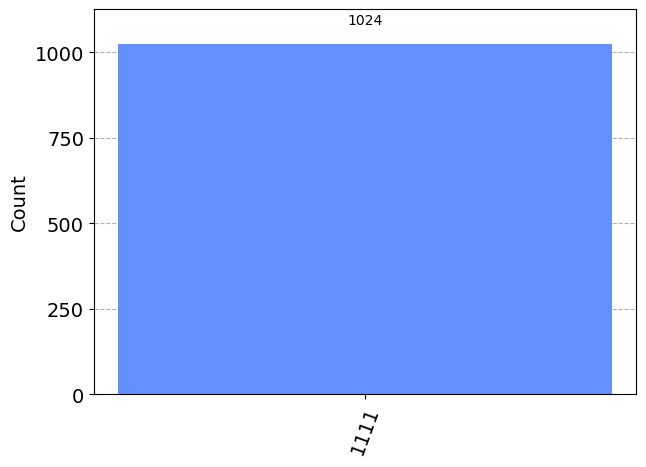

In [13]:
#creating simulation plot
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)